<hr>
<div class="alert alert-warning">
<center> <h1> Business Case 1 </h1> </center> <br>
<center> 202122_Group_PN:  </center>

 <center> - Mafalda Garcia (20210763) <center> 
<center> - Simão Pereira (20210250) <center>  
<center> - Tiago Santos (20210548) <center> 
<center> - Rui Ribeiro (20211017) <center>  

# Data Understanding

In [32]:
import os
from os.path import abspath, join, pardir
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import graphviz

from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler, RobustScaler

In [33]:
data = pd.read_excel('WonderfulWinesoftheWorld.xlsx').round(2)
data.head(10)

,Custid,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
0,5325.0,653.0,55.0,20.0,78473.0,20.0,18.0,826.0,445.0,7.0,67.0,4.0,26.0,2.0,1.0,1.0,36.0,5.0
1,3956.0,1041.0,75.0,18.0,105087.0,36.0,33.0,1852.0,539.0,2.0,49.0,0.0,46.0,1.0,3.0,0.0,20.0,4.0
2,3681.0,666.0,18.0,12.0,27984.0,4.0,56.0,39.0,-7.0,88.0,4.0,29.0,14.0,32.0,21.0,48.0,60.0,8.0
3,2829.0,1049.0,42.0,16.0,61748.0,2.0,46.0,37.0,-6.0,70.0,86.0,1.0,11.0,1.0,1.0,55.0,59.0,7.0
4,8788.0,837.0,47.0,16.0,65789.0,2.0,3.0,36.0,4.0,35.0,85.0,0.0,12.0,2.0,1.0,28.0,63.0,6.0
5,4356.0,916.0,54.0,20.0,76751.0,17.0,17.0,658.0,185.0,4.0,62.0,7.0,27.0,4.0,0.0,30.0,36.0,5.0
6,7003.0,874.0,42.0,15.0,51644.0,2.0,19.0,33.0,-5.0,74.0,75.0,1.0,22.0,0.0,2.0,23.0,44.0,5.0
7,1815.0,1063.0,70.0,16.0,83942.0,29.0,20.0,1407.0,440.0,4.0,40.0,3.0,45.0,3.0,9.0,2.0,13.0,2.0
8,9139.0,853.0,26.0,17.0,33186.0,2.0,86.0,21.0,-6.0,89.0,23.0,16.0,40.0,11.0,11.0,30.0,66.0,8.0
9,6511.0,881.0,53.0,17.0,88538.0,17.0,12.0,651.0,195.0,16.0,88.0,2.0,9.0,1.0,1.0,11.0,39.0,5.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Freq         10001 non-null  float64
 6   Recency      10001 non-null  float64
 7   Monetary     10001 non-null  float64
 8   LTV          10001 non-null  float64
 9   Perdeal      10001 non-null  float64
 10  Dryred       10001 non-null  float64
 11  Sweetred     10001 non-null  float64
 12  Drywh        10001 non-null  float64
 13  Sweetwh      10001 non-null  float64
 14  Dessert      10001 non-null  float64
 15  Exotic       10001 non-null  float64
 16  WebPurchase  10001 non-null  float64
 17  WebVisit     10001 non-null  float64
dtypes: float64(18)
memory usage: 1.4 MB


In [35]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Custid,10000.0,6000.5000,2886.895680,1001.0,3500.75,6000.5,8500.25,11000.0
Dayswus,10001.0,898.1020,202.482664,550.0,724.00,894.0,1074.00,1250.0
Age,10001.0,47.9273,17.301856,18.0,33.00,48.0,63.00,78.0
Edu,10001.0,16.7391,1.876281,12.0,15.00,17.0,18.00,20.0
Income,10001.0,69904.3580,27610.852665,10000.0,47646.00,70009.0,92147.00,140628.0
Freq,10001.0,14.6281,11.968475,1.0,4.00,12.0,24.00,56.0
Recency,10001.0,62.4068,69.870762,0.0,26.00,52.0,78.00,549.0
Monetary,10001.0,622.5552,647.102966,6.0,63.00,383.0,1077.00,3052.0
LTV,10001.0,209.0712,291.971441,-178.0,-2.00,57.0,364.00,1791.0
Perdeal,10001.0,32.3972,27.895699,0.0,6.00,25.0,56.00,97.0


In [36]:
data.isnull().sum()

Custid         1
Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [37]:
data.loc[data.duplicated(keep=False), :]

,Custid,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit


# Data Preparation

In [38]:
data = data.drop(10000) #row 10001 (index 10000) was the average of each columns
data.isnull().sum()

Custid         0
Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [39]:
data1 = data.copy()

In [40]:
data1 = data1.set_index('Custid').sort_index()
data1.head()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
1001.0,789.0,68.0,16.0,90782.0,29.0,66.0,1402.0,699.0,3.0,37.0,5.0,44.0,10.0,3.0,2.0,19.0,4.0
1002.0,623.0,78.0,20.0,113023.0,31.0,6.0,1537.0,565.0,1.0,55.0,1.0,38.0,4.0,2.0,2.0,9.0,1.0
1003.0,583.0,24.0,18.0,28344.0,4.0,69.0,44.0,-3.0,66.0,32.0,19.0,24.0,1.0,24.0,63.0,59.0,7.0
1004.0,893.0,59.0,19.0,93571.0,21.0,10.0,888.0,207.0,12.0,60.0,10.0,19.0,6.0,5.0,15.0,35.0,5.0
1005.0,1062.0,59.0,18.0,91852.0,25.0,26.0,1138.0,355.0,5.0,59.0,5.0,28.0,4.0,4.0,19.0,34.0,6.0


In [41]:
data_columns= ['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic', 'WebPurchase', 'WebVisit']

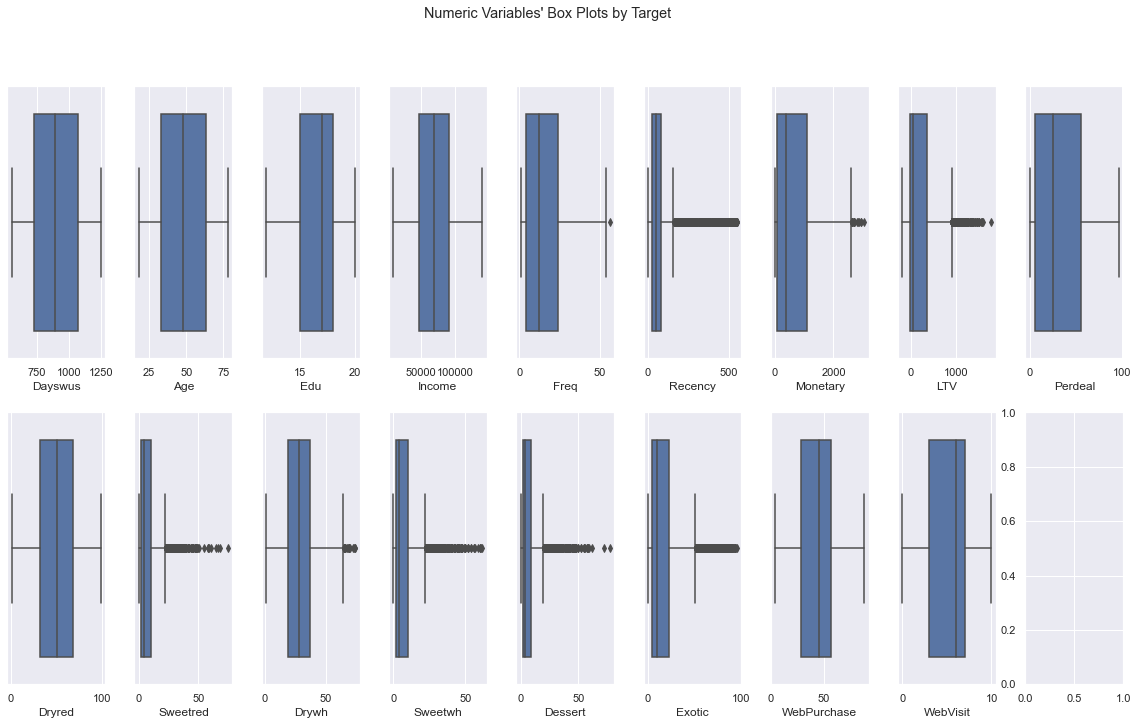

In [42]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(data_columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), data_columns):
    sns.boxplot(x=data1[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)

plt.show()

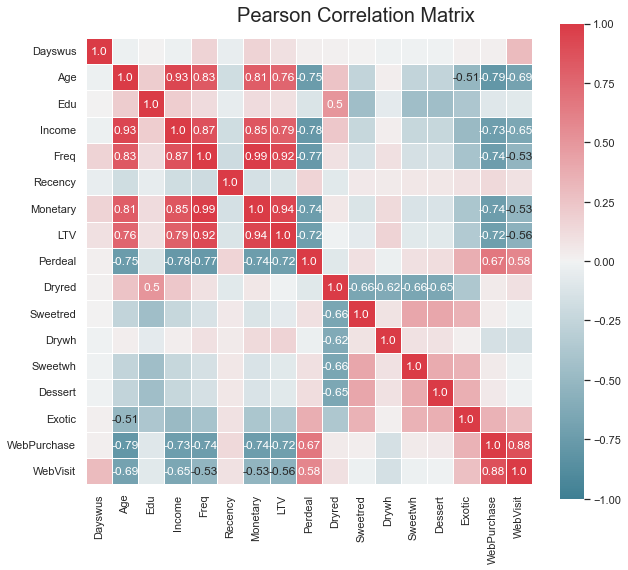

In [43]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data1[data_columns].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

In [44]:
#Regardless of the high correlation of age and income we think they are both important for the business case

In [45]:
#Droping highly correlated variable Freq with both Monetary and LTV
data1 = data1.drop(columns = ["Freq"])

In [46]:
# Droping irelevant columns
data1.drop(['Edu'], axis=1, inplace=True)

In [47]:
data2 = data1.copy()

In [48]:
#Standartization
robust_scaler = RobustScaler()
rs_feat = robust_scaler.fit_transform(data2)
rs_feat

array([[-0.29978587,  0.66666667,  0.46668914, ..., -0.42105263,
        -0.89655172, -0.5       ],
       [-0.77373305,  1.        ,  0.96643074, ..., -0.42105263,
        -1.24137931, -1.25      ],
       [-0.88793719, -0.8       , -0.93625435, ...,  2.78947368,
         0.48275862,  0.25      ],
       ...,
       [-0.87937188,  0.7       ,  0.66545332, ..., -0.31578947,
        -0.93103448, -0.75      ],
       [-0.84511064,  0.56666667,  0.92137962, ..., -0.10526316,
        -0.31034483, -0.5       ],
       [-0.35117773, -0.93333333, -0.98027188, ...,  2.78947368,
         0.24137931, -0.25      ]])

In [49]:
data2 =pd.DataFrame(rs_feat, columns=['Dayswus', 'Age', 'Income', 'Recency', 'Monetary', 'LTV',
       'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic', 'WebPurchase', 'WebVisit'])
data2

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
0,-0.299786,0.666667,0.466689,0.267943,1.004931,1.754098,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50
1,-0.773733,1.000000,0.966431,-0.880383,1.138067,1.387978,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25
2,-0.887937,-0.800000,-0.936254,0.325359,-0.334320,-0.163934,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25
3,-0.002855,0.366667,0.529356,-0.803828,0.498028,0.409836,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25
4,0.479657,0.366667,0.490731,-0.497608,0.744576,0.814208,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.208423,-0.666667,-0.353219,0.382775,0.619329,1.035519,-0.36,-0.270270,0.875,0.444444,-0.375,1.000000,1.684211,-0.482759,0.00
9996,-0.733762,0.933333,1.257162,0.440191,1.267258,1.144809,-0.44,0.270270,-0.250,-0.166667,0.125,0.285714,-0.473684,0.000000,-0.25
9997,-0.879372,0.700000,0.665453,0.880383,1.071006,1.532787,-0.46,-0.135135,-0.500,0.055556,0.875,1.428571,-0.315789,-0.931034,-0.75
9998,-0.845111,0.566667,0.921380,-0.918660,0.953649,1.863388,-0.42,-0.081081,1.500,-0.055556,0.500,-0.428571,-0.105263,-0.310345,-0.50


# Modeling

### Segmentation

In [50]:
# Define value and behavior
seg_value = ['Dayswus', 'Income', 'Monetary', 'LTV']
seg_behavior = ['Perdeal',
 'Dryred',
 'Sweetred',
 'Drywh',
 'Sweetwh',
 'Dessert',
 'Exotic',
 'WebPurchase',
 'WebVisit','Recency']

In [51]:
df_value = data2[seg_value].copy()
df_behavior = data2[seg_behavior].copy()

In [52]:
df_value.head(10)

,Dayswus,Income,Monetary,LTV
0,-0.299786,0.466689,1.004931,1.754098
1,-0.773733,0.966431,1.138067,1.387978
2,-0.887937,-0.936254,-0.334320,-0.163934
3,-0.002855,0.529356,0.498028,0.409836
4,0.479657,0.490731,0.744576,0.814208
5,-0.291221,-1.070127,-0.322485,-0.204918
6,0.645253,-0.011841,-0.037475,-0.278689
7,-0.673804,-0.031682,-0.337278,-0.131148
8,-0.291221,0.887249,1.003945,1.519126
9,0.613847,-1.037322,-0.358974,-0.158470


In [53]:
df_value1 = data1[seg_value].copy()
df_behavior1 = data1[seg_behavior].copy()

In [54]:
df_value1

,Dayswus,Income,Monetary,LTV
Custid,,,,
1001.0,789.0,90782.0,1402.0,699.0
1002.0,623.0,113023.0,1537.0,565.0
1003.0,583.0,28344.0,44.0,-3.0
1004.0,893.0,93571.0,888.0,207.0
1005.0,1062.0,91852.0,1138.0,355.0
...,...,...,...,...
10996.0,967.0,54292.0,1011.0,436.0
10997.0,637.0,125962.0,1668.0,476.0
10998.0,586.0,99628.0,1469.0,618.0


In [55]:
df_value1.reset_index(drop=True, inplace=True)

In [56]:
df_behavior1.reset_index(drop=True, inplace=True)

In [57]:
df_behavior.head(10)

,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Recency
0,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50,0.267943
1,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25,-0.880383
2,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25,0.325359
3,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25,-0.803828
4,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00,-0.497608
5,1.42,-0.108108,-0.250,1.111111,-0.250,-0.428571,1.000000,0.758621,0.75,0.248804
6,0.72,0.540541,0.375,-0.833333,-0.375,0.571429,-0.368421,0.034483,0.25,0.401914
7,-0.20,0.891892,-0.375,-0.888889,-0.250,-0.571429,-0.368421,-0.275862,-0.75,-0.153110
8,-0.44,-0.351351,0.625,0.388889,0.625,0.714286,-0.052632,-0.965517,-1.25,0.440191
9,0.60,-0.891892,6.375,-0.611111,0.750,-0.428571,-0.210526,-0.206897,0.25,1.933014


## K-Means - Behavior

In [58]:
#Behavior
range_clusters = range(1, 10)

In [59]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_behavior)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

In [60]:
inertia

[77986.64971051924,
 60446.23518659766,
 47960.394271498146,
 40961.86578037461,
 37053.43133704884,
 34299.56693075328,
 32500.051237091786,
 31027.29980771988,
 29594.274195737562]

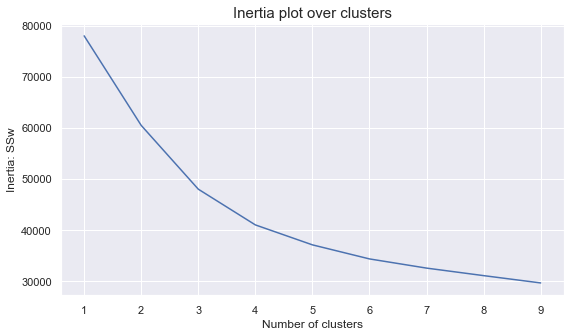

In [61]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range(1,10), inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [62]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_behavior)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_behavior, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.35758413253572785
For n_clusters = 3, the average silhouette_score is : 0.349669943431636
For n_clusters = 4, the average silhouette_score is : 0.21714962365166712
For n_clusters = 5, the average silhouette_score is : 0.21539581667574512
For n_clusters = 6, the average silhouette_score is : 0.2172192198825285
For n_clusters = 7, the average silhouette_score is : 0.20041683572211816
For n_clusters = 8, the average silhouette_score is : 0.198616067320264
For n_clusters = 9, the average silhouette_score is : 0.193244925185007


In [63]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
kmeans_labels_behavior = kmclust.fit_predict(df_behavior)
kmeans_labels_behavior

array([2, 2, 0, ..., 2, 2, 0])

In [64]:
kmeans_labels_behavior.shape

(10000,)

In [65]:
data2

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
0,-0.299786,0.666667,0.466689,0.267943,1.004931,1.754098,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50
1,-0.773733,1.000000,0.966431,-0.880383,1.138067,1.387978,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25
2,-0.887937,-0.800000,-0.936254,0.325359,-0.334320,-0.163934,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25
3,-0.002855,0.366667,0.529356,-0.803828,0.498028,0.409836,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25
4,0.479657,0.366667,0.490731,-0.497608,0.744576,0.814208,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.208423,-0.666667,-0.353219,0.382775,0.619329,1.035519,-0.36,-0.270270,0.875,0.444444,-0.375,1.000000,1.684211,-0.482759,0.00
9996,-0.733762,0.933333,1.257162,0.440191,1.267258,1.144809,-0.44,0.270270,-0.250,-0.166667,0.125,0.285714,-0.473684,0.000000,-0.25
9997,-0.879372,0.700000,0.665453,0.880383,1.071006,1.532787,-0.46,-0.135135,-0.500,0.055556,0.875,1.428571,-0.315789,-0.931034,-0.75
9998,-0.845111,0.566667,0.921380,-0.918660,0.953649,1.863388,-0.42,-0.081081,1.500,-0.055556,0.500,-0.428571,-0.105263,-0.310345,-0.50


In [66]:
data_kmeans_behavior = pd.concat((df_behavior1, pd.Series(kmeans_labels_behavior, name='labels')), axis=1)
behavior_kmeans_avg=data_kmeans_behavior.groupby('labels').mean().round(2)
behavior_kmeans_avg

,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Recency
labels,,,,,,,,,,
0,41.18,22.31,15.83,30.19,15.73,15.92,30.86,46.76,5.50,52.96
1,57.96,39.91,9.40,31.60,9.77,9.34,25.22,57.28,6.49,400.70
2,28.56,59.67,4.19,27.87,4.23,4.02,11.67,40.37,5.07,51.29


In [67]:
data_kmeans_behavior

,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Recency,labels
0,3.0,37.0,5.0,44.0,10.0,3.0,2.0,19.0,4.0,66.0,2
1,1.0,55.0,1.0,38.0,4.0,2.0,2.0,9.0,1.0,6.0,2
2,66.0,32.0,19.0,24.0,1.0,24.0,63.0,59.0,7.0,69.0,0
3,12.0,60.0,10.0,19.0,6.0,5.0,15.0,35.0,5.0,10.0,2
4,5.0,59.0,5.0,28.0,4.0,4.0,19.0,34.0,6.0,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.0,41.0,11.0,36.0,1.0,11.0,42.0,31.0,6.0,72.0,2
9996,3.0,61.0,2.0,25.0,5.0,6.0,1.0,45.0,5.0,75.0,2
9997,2.0,46.0,0.0,29.0,11.0,14.0,4.0,18.0,3.0,98.0,2
9998,4.0,48.0,16.0,27.0,8.0,1.0,8.0,36.0,4.0,4.0,2


## K-Means Value

In [119]:
#Behavior
range_clusters = range(1, 10)

In [120]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_value)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

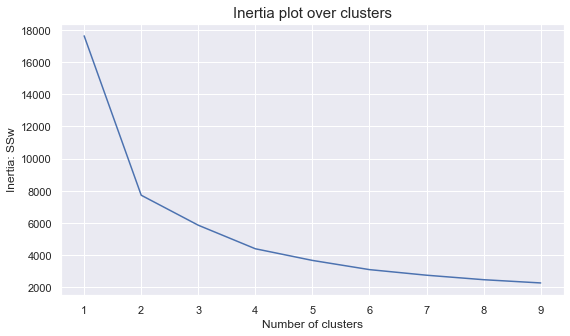

In [121]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range(1, 10), inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [122]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_value)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_value, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.5019335471369353
For n_clusters = 3, the average silhouette_score is : 0.3693833032572532
For n_clusters = 4, the average silhouette_score is : 0.3482587243543817
For n_clusters = 5, the average silhouette_score is : 0.35544918000855796
For n_clusters = 6, the average silhouette_score is : 0.3470270854421799
For n_clusters = 7, the average silhouette_score is : 0.33232104809170554
For n_clusters = 8, the average silhouette_score is : 0.31943331792240515
For n_clusters = 9, the average silhouette_score is : 0.30514478484549834


In [72]:
# final cluster solution
number_clusters = 2
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
kmeans_labels_value = kmclust.fit_predict(df_value)
kmeans_labels_value

array([1, 1, 0, ..., 1, 1, 0])

In [73]:
data_kmeans_value = pd.concat((df_value1, pd.Series(kmeans_labels_value, name='labels')), axis=1)
value_kmeans_avg=data_kmeans_value.groupby('labels').mean().round(2)
value_kmeans_avg

,Dayswus,Income,Monetary,LTV
labels,,,,
0,886.70,55850.84,245.05,41.08
1,923.18,100822.11,1453.07,578.65


#  Hierarchical Clustering Value

In [74]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    
    
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  # SST = SSW + SSB
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

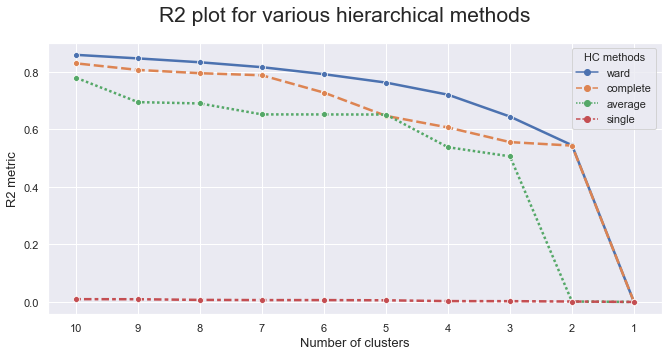

In [75]:
#SEG_VALUE

# Prepare input 
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=data2[seg_value], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [76]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'complete'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(data2[seg_value])

array([6179, 5611, 9482, ...,    2,    1,    0], dtype=int64)

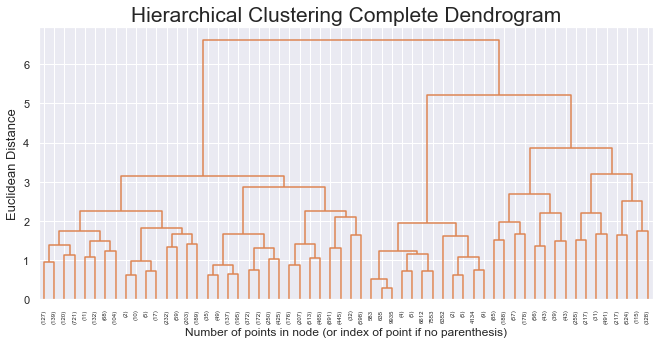

In [77]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))

y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Complete Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [78]:
# Hierarchical clustering with 4 clusters
linkage = 'complete'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
hc4_value_labels = hc4lust.fit_predict(data2[seg_value])
hc4_value_labels

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [79]:
data_hc_value = pd.concat((df_value, pd.Series(hc4_value_labels, name='labels')), axis=1)
value_hc_avg=data_hc_value.groupby('labels').mean()
value_hc_avg

,Dayswus,Income,Monetary,LTV
labels,,,,
0,0.027255,0.637881,0.914026,1.199841
1,-0.036755,-0.291143,-0.109928,-0.015371
2,0.540953,1.179945,2.141765,3.730362
3,0.437510,0.894273,1.572993,2.222755


#  Hierarchical Clustering Behavior

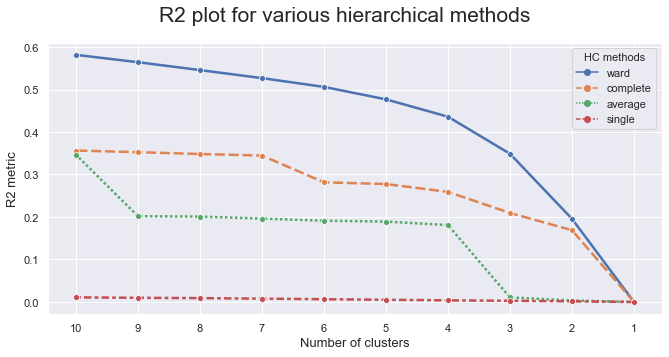

In [80]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=data2[seg_behavior], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [81]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(data2[seg_behavior])

array([5547, 9572, 5723, ...,    1,    2,    0], dtype=int64)

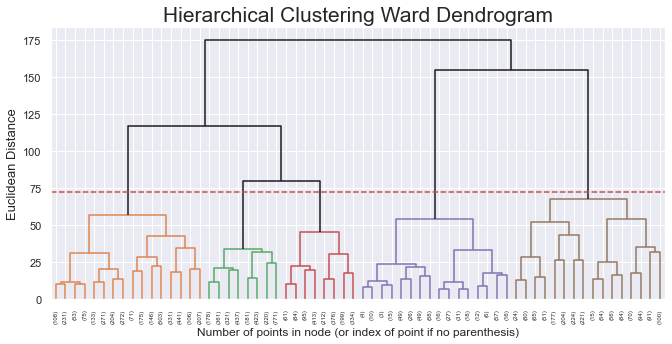

In [82]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))

y_threshold = 72
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Ward Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [83]:
# Hierarchical clustering with 5 clusters
linkage = 'ward'
distance = 'euclidean'
hc5lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=5)
hc5_behav_labels = hc5lust.fit_predict(data2[seg_behavior])
hc5_behav_labels

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [84]:
data_hc_behavior = pd.concat((df_behavior, pd.Series(hc5_behav_labels, name='labels')), axis=1)
behavior_hc_avg=data_hc_behavior.groupby('labels').mean()
behavior_hc_avg

,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Recency
labels,,,,,,,,,,
0,0.472348,-0.836428,1.711180,0.051449,1.583307,1.807365,1.333148,0.248490,0.040373,-0.036756
1,-0.279092,-0.191204,0.386121,0.337040,0.434288,0.491133,-0.086359,-0.714996,-0.728735,-0.067115
2,0.669924,-0.255225,0.650819,0.166107,0.668451,0.699892,0.757126,0.414488,0.113350,5.754643
3,0.572142,-0.040800,0.125705,0.424621,0.139868,0.106217,0.696078,0.421879,0.240417,0.108457
4,0.126750,0.687984,-0.243041,-0.599508,-0.231760,-0.276477,0.017671,0.055671,-0.024378,-0.070122


## Merged Solution

In [85]:
data3 = data2.copy()

### Merge of KMeans outputs using HC

In [86]:
data_kmeans_behavior["labels"].value_counts()

2    7370
0    2323
1     307
Name: labels, dtype: int64

In [87]:
data_kmeans_value["labels"].value_counts()

0    6875
1    3125
Name: labels, dtype: int64

In [88]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_merge = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
value_labels = kmeans_merge.fit_predict(df_value)
behavior_labels = kmeans_merge.fit_predict(df_behavior)

data3['value_labels'] = value_labels
data3['behavior_labels'] = behavior_labels
data3

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels
0,-0.299786,0.666667,0.466689,0.267943,1.004931,1.754098,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50,0,0
1,-0.773733,1.000000,0.966431,-0.880383,1.138067,1.387978,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25,0,0
2,-0.887937,-0.800000,-0.936254,0.325359,-0.334320,-0.163934,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25,2,2
3,-0.002855,0.366667,0.529356,-0.803828,0.498028,0.409836,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25,1,0
4,0.479657,0.366667,0.490731,-0.497608,0.744576,0.814208,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.208423,-0.666667,-0.353219,0.382775,0.619329,1.035519,-0.36,-0.270270,0.875,0.444444,-0.375,1.000000,1.684211,-0.482759,0.00,1,0
9996,-0.733762,0.933333,1.257162,0.440191,1.267258,1.144809,-0.44,0.270270,-0.250,-0.166667,0.125,0.285714,-0.473684,0.000000,-0.25,0,0
9997,-0.879372,0.700000,0.665453,0.880383,1.071006,1.532787,-0.46,-0.135135,-0.500,0.055556,0.875,1.428571,-0.315789,-0.931034,-0.75,0,0
9998,-0.845111,0.566667,0.921380,-0.918660,0.953649,1.863388,-0.42,-0.081081,1.500,-0.055556,0.500,-0.428571,-0.105263,-0.310345,-0.50,0,0


In [89]:
# Centroids of the concatenated cluster labels
df_centroids = data3.groupby(['behavior_labels', 'value_labels']).mean()
df_centroids

Dayswus       Age    Income   Recency  \
behavior_labels value_labels                                           
0               0             0.153967  0.723772  0.816029 -0.020423   
                1            -0.008749  0.352019  0.376861 -0.038760   
                2            -0.022444 -0.277558 -0.330363  0.007307   
1               2            -0.130684 -0.577090 -0.636493  6.673690   
2               0             0.155802  0.722709  0.814127 -0.022265   
                1            -0.083447  0.459091  0.475378 -0.073945   
                2             0.007938 -0.706439 -0.724049  0.044691   

                              Monetary       LTV   Perdeal    Dryred  \
behavior_labels value_labels                                           
0               0             1.344691  1.871732 -0.448395 -0.031952   
                1             0.472554  0.565386 -0.229500  0.311096   
                2            -0.204680 -0.128161  0.513576  0.297983   
1               2            -0.361827 -0.158016  0.659283 -0.299762   
2               0             1.254689  1.772168 -0.458008 -0.727038   
                1             0.453984  0.614352 -0.310000 -0.601026   
                2            -0.292075 -0.143758  0.578669 -0.820902   

                              Sweetred     Drywh   Sweetwh   Dessert  \
behavior_labels value_labels                                           
0               0             0.150411  0.376864  0.150576  0.139004   
                1             0.040823 -0.185338  0.049349  0.010394   
                2            -0.043792 -0.052252 -0.040695 -0.063330   
1               2             0.675081  0.199783  0.721498  0.763146   
2               0             1.308267  0.298805  1.191733  1.505407   
                1             1.359291  0.005645  1.229278  1.484339   
                2             1.529446  0.121286  1.559629  1.781003   

                                Exotic  WebPurchase  WebVisit  
behavior_labels value_labels                                   
0               0            -0.212154    -0.874025 -0.736678  
                1            -0.029199    -0.323901 -0.356139  
                2             0.303794     0.272877  0.080224  
1               2             0.801303     0.423565  0.122964  
2               0             0.225414    -0.966754 -0.898406  
                1             0.391078    -0.620505 -0.727941  
                2             1.382524     0.362617  0.122203

In [90]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

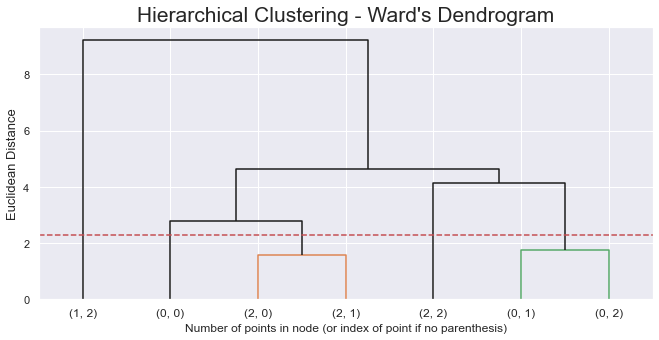

In [91]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
nsamples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node nsamples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < nsamples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - nsamples]
    counts[i] = current_count

# the hclust.children is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.3
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [92]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Dayswus       Age    Income   Recency  \
behavior_labels value_labels                                           
0               0             0.153967  0.723772  0.816029 -0.020423   
                1            -0.008749  0.352019  0.376861 -0.038760   
                2            -0.022444 -0.277558 -0.330363  0.007307   
1               2            -0.130684 -0.577090 -0.636493  6.673690   
2               0             0.155802  0.722709  0.814127 -0.022265   
                1            -0.083447  0.459091  0.475378 -0.073945   
                2             0.007938 -0.706439 -0.724049  0.044691   

                              Monetary       LTV   Perdeal    Dryred  \
behavior_labels value_labels                                           
0               0             1.344691  1.871732 -0.448395 -0.031952   
                1             0.472554  0.565386 -0.229500  0.311096   
                2            -0.204680 -0.128161  0.513576  0.297983   
1               2            -0.361827 -0.158016  0.659283 -0.299762   
2               0             1.254689  1.772168 -0.458008 -0.727038   
                1             0.453984  0.614352 -0.310000 -0.601026   
                2            -0.292075 -0.143758  0.578669 -0.820902   

                              Sweetred     Drywh   Sweetwh   Dessert  \
behavior_labels value_labels                                           
0               0             0.150411  0.376864  0.150576  0.139004   
                1             0.040823 -0.185338  0.049349  0.010394   
                2            -0.043792 -0.052252 -0.040695 -0.063330   
1               2             0.675081  0.199783  0.721498  0.763146   
2               0             1.308267  0.298805  1.191733  1.505407   
                1             1.359291  0.005645  1.229278  1.484339   
                2             1.529446  0.121286  1.559629  1.781003   

                                Exotic  WebPurchase  WebVisit  hclust_labels  
behavior_labels value_labels                                                  
0               0            -0.212154    -0.874025 -0.736678              4  
                1            -0.029199    -0.323901 -0.356139              0  
                2             0.303794     0.272877  0.080224              0  
1               2             0.801303     0.423565  0.122964              3  
2               0             0.225414    -0.966754 -0.898406              2  
                1             0.391078    -0.620505 -0.727941              2  
                2             1.382524     0.362617  0.122203              1

In [93]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

data_kmeans_merged = data3.copy()

# Mapping the hierarchical clusters on the centroids to the observations
data_kmeans_merged['merged_labels'] = data_kmeans_merged.apply(
    lambda row: cluster_mapper[
        (row['behavior_labels'], row['value_labels'])
    ], axis=1
)

# Merged cluster centroids
data_kmeans_merged.groupby('merged_labels').mean()

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels
merged_labels,,,,,,,,,,,,,,,,,
0,-0.016781,-0.017225,-0.037923,-0.011742,0.075359,0.158624,0.206311,0.303405,-0.008803,-0.107284,-0.003462,-0.032845,0.166100,0.026107,-0.100214,1.586496,0.0
1,0.007938,-0.706439,-0.724049,0.044691,-0.292075,-0.143758,0.578669,-0.820902,1.529446,0.121286,1.559629,1.781003,1.382524,0.362617,0.122203,2.000000,2.0
2,0.012636,0.564960,0.611419,-0.053190,0.775547,1.079331,-0.369440,-0.651632,1.338800,0.123378,1.214200,1.492800,0.324547,-0.759559,-0.796400,0.598400,2.0
3,-0.130684,-0.577090,-0.636493,6.673690,-0.361827,-0.158016,0.659283,-0.299762,0.675081,0.199783,0.721498,0.763146,0.801303,0.423565,0.122964,2.000000,1.0
4,0.153967,0.723772,0.816029,-0.020423,1.344691,1.871732,-0.448395,-0.031952,0.150411,0.376864,0.150576,0.139004,-0.212154,-0.874025,-0.736678,0.000000,0.0


In [94]:
#Merge cluster contigency table
# Getting size of each final cluster
data4_counts = data_kmeans_merged.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
data4_counts = data4_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

data4_counts['behavior_labels'] = data4_counts['merged_labels'].apply(lambda x: x[0])
data4_counts['value_labels'] = data4_counts['merged_labels'].apply(lambda x: x[1])
data4_counts.pivot('behavior_labels', 'value_labels', 0)

value_labels,0,1,2
behavior_labels,,,
0,1520.0,NaN,5850.0
1,NaN,NaN,307.0
2,NaN,625.0,1698.0


In [95]:
data_kmeans_merged

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels,merged_labels
0,-0.299786,0.666667,0.466689,0.267943,1.004931,1.754098,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50,0,0,4
1,-0.773733,1.000000,0.966431,-0.880383,1.138067,1.387978,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25,0,0,4
2,-0.887937,-0.800000,-0.936254,0.325359,-0.334320,-0.163934,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25,2,2,1
3,-0.002855,0.366667,0.529356,-0.803828,0.498028,0.409836,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25,1,0,0
4,0.479657,0.366667,0.490731,-0.497608,0.744576,0.814208,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.208423,-0.666667,-0.353219,0.382775,0.619329,1.035519,-0.36,-0.270270,0.875,0.444444,-0.375,1.000000,1.684211,-0.482759,0.00,1,0,0
9996,-0.733762,0.933333,1.257162,0.440191,1.267258,1.144809,-0.44,0.270270,-0.250,-0.166667,0.125,0.285714,-0.473684,0.000000,-0.25,0,0,4
9997,-0.879372,0.700000,0.665453,0.880383,1.071006,1.532787,-0.46,-0.135135,-0.500,0.055556,0.875,1.428571,-0.315789,-0.931034,-0.75,0,0,4
9998,-0.845111,0.566667,0.921380,-0.918660,0.953649,1.863388,-0.42,-0.081081,1.500,-0.055556,0.500,-0.428571,-0.105263,-0.310345,-0.50,0,0,4


# Merge of HC outputs using HC

In [96]:
data4 = data2.copy()

In [97]:
data_hc_behavior["labels"].value_counts()

1    3327
4    2892
3    1774
0    1610
2     397
Name: labels, dtype: int64

In [98]:
data_hc_value["labels"].value_counts()

1    7101
0    2178
3     689
2      32
Name: labels, dtype: int64

In [99]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
data4['value_labels'] = hc4_value_labels
data4['behavior_labels'] = hc5_behav_labels
data4

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels
0,-0.299786,0.666667,0.466689,0.267943,1.004931,1.754098,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50,0,1
1,-0.773733,1.000000,0.966431,-0.880383,1.138067,1.387978,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25,0,1
2,-0.887937,-0.800000,-0.936254,0.325359,-0.334320,-0.163934,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25,1,0
3,-0.002855,0.366667,0.529356,-0.803828,0.498028,0.409836,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25,1,1
4,0.479657,0.366667,0.490731,-0.497608,0.744576,0.814208,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.208423,-0.666667,-0.353219,0.382775,0.619329,1.035519,-0.36,-0.270270,0.875,0.444444,-0.375,1.000000,1.684211,-0.482759,0.00,1,0
9996,-0.733762,0.933333,1.257162,0.440191,1.267258,1.144809,-0.44,0.270270,-0.250,-0.166667,0.125,0.285714,-0.473684,0.000000,-0.25,0,4
9997,-0.879372,0.700000,0.665453,0.880383,1.071006,1.532787,-0.46,-0.135135,-0.500,0.055556,0.875,1.428571,-0.315789,-0.931034,-0.75,0,1
9998,-0.845111,0.566667,0.921380,-0.918660,0.953649,1.863388,-0.42,-0.081081,1.500,-0.055556,0.500,-0.428571,-0.105263,-0.310345,-0.50,0,1


In [100]:
# Centroids of the concatenated cluster labels
df_centroids2 = data4.groupby(['behavior_labels', 'value_labels']).mean()
df_centroids2

Dayswus       Age    Income   Recency  \
behavior_labels value_labels                                           
0               0             0.061601  0.631313  0.639955 -0.001160   
                1             0.012409 -0.676516 -0.688388 -0.038717   
                3             0.618398  0.747917  0.866224 -0.056220   
1               0            -0.078512  0.666957  0.696976 -0.061986   
                1            -0.172878  0.132137  0.069702 -0.105138   
                2             0.514836  0.872619  1.186156  0.017772   
                3             0.412940  0.783162  0.903597 -0.004242   
2               1            -0.118282 -0.560873 -0.627724  5.754643   
3               0             0.331763  0.380513  0.454959  0.077144   
                1             0.071500 -0.439045 -0.443187  0.109497   
                3             0.630978  0.673333  0.755106  0.160766   
4               0             0.284435  0.381453  0.491751 -0.007978   
                1            -0.061996 -0.023253 -0.056791 -0.088430   
                2             0.723769  0.783333  1.136462  0.535885   
                3             0.545284  0.666667  0.839519  0.031169   

                              Monetary       LTV   Perdeal    Dryred  \
behavior_labels value_labels                                           
0               0             0.861684  1.162085 -0.404848 -0.666121   
                1            -0.255594 -0.113864  0.551467 -0.850575   
                3             1.577848  2.235741 -0.470625 -0.709459   
1               0             0.954584  1.281487 -0.422039 -0.219842   
                1             0.080598  0.192824 -0.010457 -0.147701   
                2             2.135566  3.710285 -0.488571 -0.145753   
                3             1.581654  2.224734 -0.468694 -0.211665   
2               1            -0.361752 -0.158243  0.669924 -0.255225   
3               0             0.787847  0.988735 -0.314154  0.061123   
                1            -0.208392 -0.131746  0.608979 -0.044744   
                3             1.413018  1.949727 -0.460000 -0.021622   
4               0             0.823992  1.000465 -0.292084  0.667562   
                1            -0.001165  0.048003  0.240192  0.696155   
                2             2.185158  3.870902 -0.480000  0.702703   
                3             1.510186  2.219867 -0.428571  0.571815   

                              Sweetred     Drywh   Sweetwh   Dessert  \
behavior_labels value_labels                                           
0               0             2.087121  0.050505  1.069444  1.059163   
                1             1.688556  0.048606  1.627113  1.865739   
                3             1.593750  0.185764  1.148438  1.424107   
1               0             0.366365  0.431254  0.416583  0.443902   
                1             0.468597  0.111972  0.535685  0.630506   
                2             0.138393  0.486111  0.236607  0.372449   
                3             0.274914  0.562619  0.275558  0.324251   
2               1             0.650819  0.166107  0.668451  0.699892   
3               0             0.178846  0.126496  0.203846  0.197802   
                1             0.122506  0.438282  0.135343  0.100771   
                3             0.525000 -0.355556  0.850000  0.771429   
4               0            -0.178776 -0.619609 -0.194551 -0.232723   
                1            -0.259532 -0.599104 -0.243573 -0.288640   
                2            -0.187500 -0.555556 -0.343750 -0.428571   
                3            -0.185714 -0.465079 -0.116071 -0.195918   

                                Exotic  WebPurchase  WebVisit  
behavior_labels value_labels                                   
0               0             0.437002    -0.847440 -0.866162  
                1             1.416284     0.347695  0.117816  
                3             0.263158    -0.946121 -0.734375  
1               0            -0.1492

In [101]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids2)

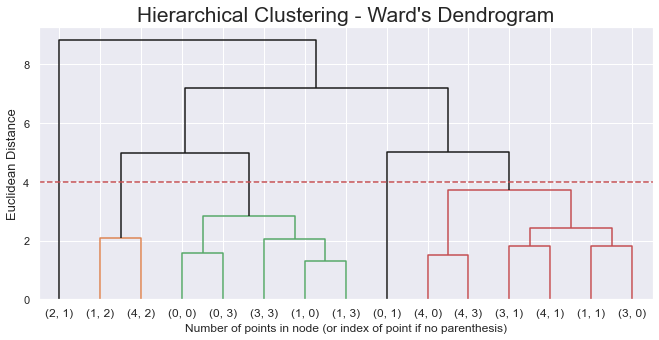

In [102]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
nsamples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node nsamples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < nsamples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - nsamples]
    counts[i] = current_count

# the hclust.children is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids2.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [103]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids2)
df_centroids2['hclust_labels'] = hclust_labels

df_centroids2  # centroid's cluster labels

Dayswus       Age    Income   Recency  \
behavior_labels value_labels                                           
0               0             0.061601  0.631313  0.639955 -0.001160   
                1             0.012409 -0.676516 -0.688388 -0.038717   
                3             0.618398  0.747917  0.866224 -0.056220   
1               0            -0.078512  0.666957  0.696976 -0.061986   
                1            -0.172878  0.132137  0.069702 -0.105138   
                2             0.514836  0.872619  1.186156  0.017772   
                3             0.412940  0.783162  0.903597 -0.004242   
2               1            -0.118282 -0.560873 -0.627724  5.754643   
3               0             0.331763  0.380513  0.454959  0.077144   
                1             0.071500 -0.439045 -0.443187  0.109497   
                3             0.630978  0.673333  0.755106  0.160766   
4               0             0.284435  0.381453  0.491751 -0.007978   
                1            -0.061996 -0.023253 -0.056791 -0.088430   
                2             0.723769  0.783333  1.136462  0.535885   
                3             0.545284  0.666667  0.839519  0.031169   

                              Monetary       LTV   Perdeal    Dryred  \
behavior_labels value_labels                                           
0               0             0.861684  1.162085 -0.404848 -0.666121   
                1            -0.255594 -0.113864  0.551467 -0.850575   
                3             1.577848  2.235741 -0.470625 -0.709459   
1               0             0.954584  1.281487 -0.422039 -0.219842   
                1             0.080598  0.192824 -0.010457 -0.147701   
                2             2.135566  3.710285 -0.488571 -0.145753   
                3             1.581654  2.224734 -0.468694 -0.211665   
2               1            -0.361752 -0.158243  0.669924 -0.255225   
3               0             0.787847  0.988735 -0.314154  0.061123   
                1            -0.208392 -0.131746  0.608979 -0.044744   
                3             1.413018  1.949727 -0.460000 -0.021622   
4               0             0.823992  1.000465 -0.292084  0.667562   
                1            -0.001165  0.048003  0.240192  0.696155   
                2             2.185158  3.870902 -0.480000  0.702703   
                3             1.510186  2.219867 -0.428571  0.571815   

                              Sweetred     Drywh   Sweetwh   Dessert  \
behavior_labels value_labels                                           
0               0             2.087121  0.050505  1.069444  1.059163   
                1             1.688556  0.048606  1.627113  1.865739   
                3             1.593750  0.185764  1.148438  1.424107   
1               0             0.366365  0.431254  0.416583  0.443902   
                1             0.468597  0.111972  0.535685  0.630506   
                2             0.138393  0.486111  0.236607  0.372449   
                3             0.274914  0.562619  0.275558  0.324251   
2               1             0.650819  0.166107  0.668451  0.699892   
3               0             0.178846  0.126496  0.203846  0.197802   
                1             0.122506  0.438282  0.135343  0.100771   
                3             0.525000 -0.355556  0.850000  0.771429   
4               0            -0.178776 -0.619609 -0.194551 -0.232723   
                1            -0.259532 -0.599104 -0.243573 -0.288640   
                2            -0.187500 -0.555556 -0.343750 -0.428571   
                3            -0.185714 -0.465079 -0.116071 -0.195918   

                                Exotic  WebPurchase  WebVisit  hclust_labels  
behavior_labels value_labels                                                  
0               0             0.437002    -0.847440 -0.866162              2  
                1             1.416284     0.347695  0.117816              3  
                3             0.263158  

In [104]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids2['hclust_labels'].to_dict()

data_hc_merged = data4.copy()

# Mapping the hierarchical clusters on the centroids to the observations
data_hc_merged['merged_labels'] = data_hc_merged.apply(
    lambda row: cluster_mapper[
        (row['behavior_labels'], row['value_labels'])
    ], axis=1
)

# Merged cluster centroids
data_hc_merged.groupby('merged_labels').mean()

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels
merged_labels,,,,,,,,,,,,,,,,,
0,-0.004063,-0.062655,-0.077264,-0.024178,0.055908,0.147030,0.233374,0.294660,0.015766,-0.142652,0.039393,0.027148,0.228893,0.078719,-0.047467,0.923848,3.074112
1,0.540953,0.861458,1.179945,0.082536,2.141765,3.730362,-0.487500,-0.039696,0.097656,0.355903,0.164062,0.272321,-0.273026,-0.993534,-0.625000,2.000000,1.375000
2,0.068950,0.697163,0.751442,-0.043459,1.125700,1.539987,-0.434350,-0.244332,0.437528,0.443464,0.420269,0.454892,-0.130161,-0.912115,-0.850385,0.840652,0.945224
3,0.012409,-0.676516,-0.688388,-0.038717,-0.255594,-0.113864,0.551467,-0.850575,1.688556,0.048606,1.627113,1.865739,1.416284,0.347695,0.117816,1.000000,0.000000
4,-0.118282,-0.560873,-0.627724,5.754643,-0.361752,-0.158243,0.669924,-0.255225,0.650819,0.166107,0.668451,0.699892,0.757126,0.414488,0.113350,1.000000,2.000000


In [105]:
#Merge cluster contigency table
# Getting size of each final cluster
data4_counts = data_hc_merged.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
data4_counts = data4_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

data4_counts['behavior_labels'] = data4_counts['merged_labels'].apply(lambda x: x[0])
data4_counts['value_labels'] = data4_counts['merged_labels'].apply(lambda x: x[1])
data4_counts.pivot('behavior_labels', 'value_labels', 0)

value_labels,1,2,3
behavior_labels,,,
0,1479.0,NaN,NaN
2,397.0,NaN,NaN
3,NaN,NaN,2209.0
4,NaN,32.0,5883.0


In [106]:
data_hc_merged

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels,merged_labels
0,-0.299786,0.666667,0.466689,0.267943,1.004931,1.754098,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50,0,1,2
1,-0.773733,1.000000,0.966431,-0.880383,1.138067,1.387978,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25,0,1,2
2,-0.887937,-0.800000,-0.936254,0.325359,-0.334320,-0.163934,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25,1,0,3
3,-0.002855,0.366667,0.529356,-0.803828,0.498028,0.409836,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25,1,1,0
4,0.479657,0.366667,0.490731,-0.497608,0.744576,0.814208,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.208423,-0.666667,-0.353219,0.382775,0.619329,1.035519,-0.36,-0.270270,0.875,0.444444,-0.375,1.000000,1.684211,-0.482759,0.00,1,0,3
9996,-0.733762,0.933333,1.257162,0.440191,1.267258,1.144809,-0.44,0.270270,-0.250,-0.166667,0.125,0.285714,-0.473684,0.000000,-0.25,0,4,0
9997,-0.879372,0.700000,0.665453,0.880383,1.071006,1.532787,-0.46,-0.135135,-0.500,0.055556,0.875,1.428571,-0.315789,-0.931034,-0.75,0,1,2
9998,-0.845111,0.566667,0.921380,-0.918660,0.953649,1.863388,-0.42,-0.081081,1.500,-0.055556,0.500,-0.428571,-0.105263,-0.310345,-0.50,0,1,2


# R Squared for Optimal Solution

In [107]:
from sklearn.base import clone

def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

In [108]:
#R^2 of Segmentation Value
number_clusters = 4
kmeans2 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)

r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(data2[seg_value], kmeans2, min_k=2, max_k=10)
for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        data2[seg_value], hierarchical.set_params(linkage=linkage)
    )
pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.561685,0.543593,0.001541,0.001541,0.544963
3,0.667396,0.555741,0.506212,0.002712,0.644543
4,0.750387,0.606654,0.537952,0.002912,0.720607
5,0.791447,0.646972,0.651557,0.005751,0.762687
6,0.823876,0.727813,0.651928,0.006449,0.791884
7,0.843588,0.788090,0.652033,0.006457,0.816231
8,0.859401,0.795288,0.690094,0.007139,0.833335
9,0.870844,0.806720,0.694789,0.009427,0.846768


In [109]:
#R^2 of Segmentation Behaviour
number_clusters = 5
kmeans2 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)

r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(data2[seg_behavior], kmeans2, min_k=2, max_k=10)
for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        data2[seg_behavior], hierarchical.set_params(linkage=linkage)
    )
pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.224916,0.168873,0.003397,0.001449,0.195694
3,0.385019,0.209473,0.010742,0.002745,0.348761
4,0.474758,0.259016,0.180881,0.003699,0.436061
5,0.524875,0.277524,0.189240,0.005182,0.476880
6,0.560187,0.281621,0.191190,0.006402,0.506180
7,0.583261,0.344509,0.196200,0.007791,0.526854
8,0.602148,0.348249,0.200949,0.008984,0.545785
9,0.620522,0.352529,0.201794,0.009741,0.564316


**We concluded, based on the R^2, that the model that best explains the variables is KMeans. Therefore, we will use Kmeans Merged Labels as our optimal Solution**

# Final Solution

In [110]:
data_kmeans_merged.head()

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels,merged_labels
0,-0.299786,0.666667,0.466689,0.267943,1.004931,1.754098,-0.44,-0.378378,0.125,0.888889,0.750,-0.142857,-0.421053,-0.896552,-0.50,0,0,4
1,-0.773733,1.000000,0.966431,-0.880383,1.138067,1.387978,-0.48,0.108108,-0.375,0.555556,0.000,-0.285714,-0.421053,-1.241379,-1.25,0,0,4
2,-0.887937,-0.800000,-0.936254,0.325359,-0.334320,-0.163934,0.82,-0.513514,1.875,-0.222222,-0.375,2.857143,2.789474,0.482759,0.25,2,2,1
3,-0.002855,0.366667,0.529356,-0.803828,0.498028,0.409836,-0.26,0.243243,0.750,-0.500000,0.250,0.142857,0.263158,-0.344828,-0.25,1,0,0
4,0.479657,0.366667,0.490731,-0.497608,0.744576,0.814208,-0.40,0.216216,0.125,0.000000,0.000,0.000000,0.473684,-0.379310,0.00,1,0,0


In [111]:
data_kmeans_merged.groupby('merged_labels').mean()

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,value_labels,behavior_labels
merged_labels,,,,,,,,,,,,,,,,,
0,-0.016781,-0.017225,-0.037923,-0.011742,0.075359,0.158624,0.206311,0.303405,-0.008803,-0.107284,-0.003462,-0.032845,0.166100,0.026107,-0.100214,1.586496,0.0
1,0.007938,-0.706439,-0.724049,0.044691,-0.292075,-0.143758,0.578669,-0.820902,1.529446,0.121286,1.559629,1.781003,1.382524,0.362617,0.122203,2.000000,2.0
2,0.012636,0.564960,0.611419,-0.053190,0.775547,1.079331,-0.369440,-0.651632,1.338800,0.123378,1.214200,1.492800,0.324547,-0.759559,-0.796400,0.598400,2.0
3,-0.130684,-0.577090,-0.636493,6.673690,-0.361827,-0.158016,0.659283,-0.299762,0.675081,0.199783,0.721498,0.763146,0.801303,0.423565,0.122964,2.000000,1.0
4,0.153967,0.723772,0.816029,-0.020423,1.344691,1.871732,-0.448395,-0.031952,0.150411,0.376864,0.150576,0.139004,-0.212154,-0.874025,-0.736678,0.000000,0.0


In [112]:
data_kmeans_merged["merged_labels"].values

array([4, 4, 1, ..., 4, 4, 1], dtype=int64)

In [113]:
data1

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,
1001.0,789.0,68.0,90782.0,66.0,1402.0,699.0,3.0,37.0,5.0,44.0,10.0,3.0,2.0,19.0,4.0
1002.0,623.0,78.0,113023.0,6.0,1537.0,565.0,1.0,55.0,1.0,38.0,4.0,2.0,2.0,9.0,1.0
1003.0,583.0,24.0,28344.0,69.0,44.0,-3.0,66.0,32.0,19.0,24.0,1.0,24.0,63.0,59.0,7.0
1004.0,893.0,59.0,93571.0,10.0,888.0,207.0,12.0,60.0,10.0,19.0,6.0,5.0,15.0,35.0,5.0
1005.0,1062.0,59.0,91852.0,26.0,1138.0,355.0,5.0,59.0,5.0,28.0,4.0,4.0,19.0,34.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996.0,967.0,28.0,54292.0,72.0,1011.0,436.0,7.0,41.0,11.0,36.0,1.0,11.0,42.0,31.0,6.0
10997.0,637.0,76.0,125962.0,75.0,1668.0,476.0,3.0,61.0,2.0,25.0,5.0,6.0,1.0,45.0,5.0
10998.0,586.0,69.0,99628.0,98.0,1469.0,618.0,2.0,46.0,0.0,29.0,11.0,14.0,4.0,18.0,3.0


In [114]:
data1["merged_labels"]= data_kmeans_merged["merged_labels"].values

In [115]:
data1.groupby("merged_labels").mean()

,Dayswus,Age,Income,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
merged_labels,,,,,,,,,,,,,,,
0,888.122393,47.483248,68324.245812,51.386496,459.414530,115.056239,35.315556,62.225983,3.929573,26.068889,3.972308,3.770085,13.155897,45.757094,5.599145
1,896.780330,26.806832,37788.181390,54.335100,86.836278,4.384570,53.933451,20.626620,16.235571,30.183157,16.477032,16.467020,36.267962,55.515901,6.488810
2,898.425600,64.948800,97223.217600,49.220800,1169.404800,452.035200,6.528000,26.889600,14.710400,30.220800,13.713600,14.449600,16.166400,22.972800,2.814400
3,848.228013,30.687296,41684.866450,400.700326,16.107492,-0.833876,57.964169,39.908795,9.400651,31.596091,9.771987,9.342020,25.224756,57.283388,6.491857
4,947.926974,69.713158,106329.371711,50.932895,1746.517105,742.053947,2.580263,49.817763,5.203289,34.783553,5.204605,4.973026,5.969079,19.653289,3.053289


In [117]:
#data1.groupby("merged_labels").mean().to_excel("Cluster analysis.xlsx")